In [127]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, r2_score


In [93]:
df = pd.read_csv('btc.csv')
df = df.sort_values(by='Date', ascending=True)
df.Date = pd.to_datetime(df['Date'])
df


,Unix,Date,Symbol,Open,High,Low,Close,Volume,Volume USDT,tradecount
2799,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2798,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2797,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2796,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2795,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...
4,1744416000000,2025-04-12,BTCUSDT,83423.83,85905.00,82792.95,85276.90,18470.744370,1.557403e+09,2501196
3,1744502400000,2025-04-13,BTCUSDT,85276.91,86100.00,83034.23,83760.00,24680.041810,2.086106e+09,3275879
2,1744588800000,2025-04-14,BTCUSDT,83760.00,85799.99,83678.00,84591.58,28659.093480,2.429133e+09,3921522
1,1744675200000,2025-04-15,BTCUSDT,84591.58,86496.42,83600.00,83643.99,20910.995280,1.780972e+09,2910533


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


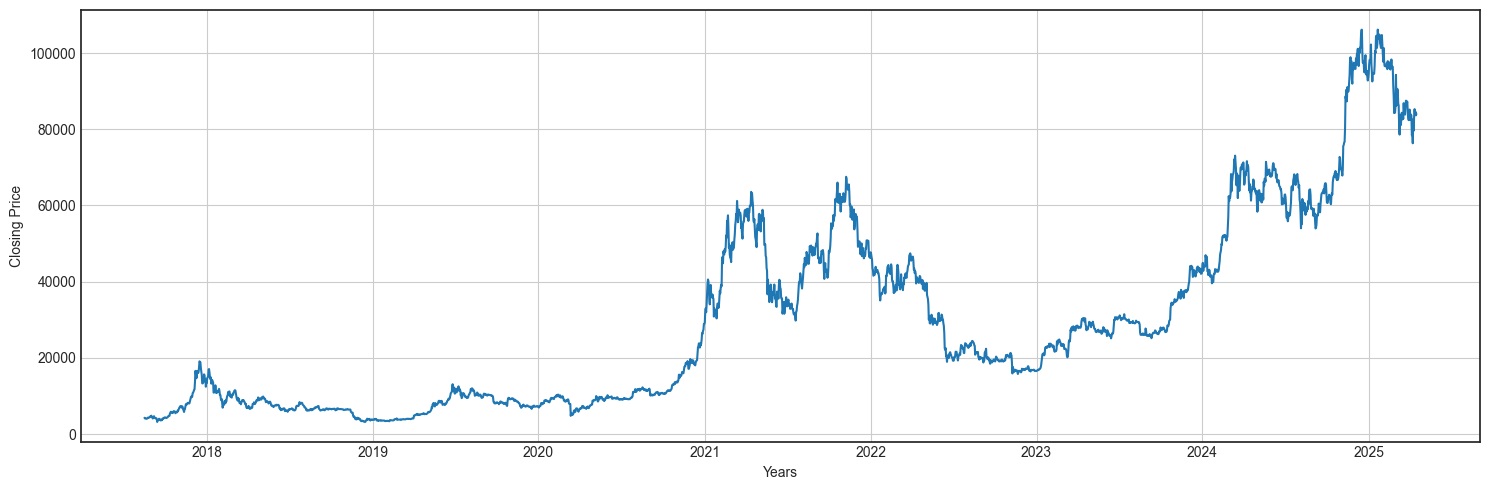

In [80]:
plt.figure(figsize=(15, 5))
plt.plot(df.Date, df.Close)
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [160]:
close_price = df[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_price)
x_data = []
y_data =  []
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data) 
scaler.inverse_transform(y_data)




array([[ 8700.01],
       [ 9128.02],
       [ 9650.  ],
       ...,
       [84591.58],
       [83643.99],
       [84030.38]])

In [158]:
spltting_len = int(len(x_data)*0.8)
x_train = x_data[:spltting_len]
y_train= y_data[:spltting_len]

x_test = x_data[spltting_len:]
y_test = y_data[spltting_len:]
scaler.inverse_transform(y_test)

array([[0.51161969],
       [0.50927218],
       [0.50750237],
       [0.50879054],
       [0.51182309],
       [0.51147436],
       [0.51259934],
       [0.51792745],
       [0.51465667],
       [0.51312427],
       [0.51547791],
       [0.51513579],
       [0.51536898],
       [0.51777538],
       [0.51931316],
       [0.52665013],
       [0.53074366],
       [0.52957376],
       [0.52912476],
       [0.52502674],
       [0.51881195],
       [0.53453747],
       [0.52298577],
       [0.52605595],
       [0.52574362],
       [0.53114058],
       [0.53174669],
       [0.5201102 ],
       [0.53147104],
       [0.53069356],
       [0.53355161],
       [0.53400899],
       [0.53173749],
       [0.53034197],
       [0.53426938],
       [0.5345132 ],
       [0.53362243],
       [0.54015637],
       [0.54539021],
       [0.54894776],
       [0.56270899],
       [0.57690225],
       [0.57478487],
       [0.5714479 ],
       [0.57756801],
       [0.57445025],
       [0.57496769],
       [0.557

In [118]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_10 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
model.fit(x_train, y_train, batch_size=1, epochs=20)
 

Epoch 1/20
2160/2160 [==============================] - 65s 30ms/step - loss: 6.3858e-04
Epoch 2/20
2160/2160 [==============================] - 65s 30ms/step - loss: 3.1836e-04
Epoch 3/20
2160/2160 [==============================] - 64s 30ms/step - loss: 3.0468e-04
Epoch 4/20
2160/2160 [==============================] - 92s 43ms/step - loss: 2.3581e-04
Epoch 5/20
2160/2160 [==============================] - 77s 36ms/step - loss: 2.2983e-04
Epoch 6/20
2160/2160 [==============================] - 96s 45ms/step - loss: 2.0084e-04
Epoch 7/20
2160/2160 [==============================] - 85s 40ms/step - loss: 2.1410e-04
Epoch 8/20
2160/2160 [==============================] - 85s 39ms/step - loss: 1.8981e-04
Epoch 9/20
2160/2160 [==============================] - 82s 38ms/step - loss: 1.9585e-04
Epoch 10/20
2160/2160 [==============================] - 80s 37ms/step - loss: 1.9463e-04
Epoch 11/20
2160/2160 [==============================] - 82s 38ms/step - loss: 1.7761e-04
Epoch 12/20
2160/21

In [150]:
predictiorns = model.predict(x_test)
inv_predictiorns = scaler.inverse_transform(predictiorns)
inv_ytest =  scaler.inverse_transform(y_test)
plotting_data = pd.DataFrame(
    {
        'original':inv_ytest.reshape(-1),
        'predictions':inv_predictiorns.reshape(-1)
    },
    index= df.index[spltting_len+100:]
)
plotting_data



17/17 [==============================] - 1s 39ms/step


,original,predictions
539,4.108179e+34,34634.984375
538,4.067165e+34,35161.601562
537,4.036244e+34,34719.625000
536,4.058750e+34,34305.429688
535,4.111733e+34,34415.898438
...,...,...
4,1.015573e+35,80503.156250
3,9.975081e+34,82153.929688
2,1.007411e+35,81175.921875
1,9.961265e+34,81678.375000


In [147]:
model.save('model.h5')

c:\Users\mufor\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
